In [160]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Reading the file (csv)

df=pd.read_csv("drug.csv")

# The first 5 obs. fromt the data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [162]:
# The last 5 obs. from the data
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [163]:
# Descriptive statistics of the data

df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [164]:
# Checking for the null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [165]:
# Checking the type of every column in the data

print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


C:\Users\Sandhya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

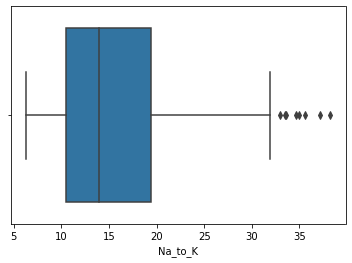

In [167]:
# Plotting the data using seaborn

sns.boxplot(df['Na_to_K'])

In [168]:
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [169]:
y=df['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [170]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [172]:
x.shape,y.shape

((200, 5), (200,))

In [173]:
x_train.shape,y_train.shape

((140, 5), (140,))

In [174]:
x_test.shape,y_test.shape

((60, 5), (60,))

In [175]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [176]:
x_train['Cholesterol']=le.fit_transform(x_train['Cholesterol'])
x_train['Cholesterol']

134    0
62     1
20     1
21     0
45     1
      ..
148    1
137    0
156    1
15     1
99     1
Name: Cholesterol, Length: 140, dtype: int32

In [177]:
# x_train=le.fit_transform(x_train)
# x_train

In [178]:
x_test['Cholesterol']=le.transform(x_test['Cholesterol'])
x_test['Cholesterol']

150    1
28     1
13     0
178    0
109    0
168    1
177    0
196    0
47     0
195    0
136    0
77     1
187    0
166    0
84     0
175    0
155    0
167    0
121    1
192    0
176    1
113    1
89     1
147    1
185    1
143    1
199    1
126    0
5      0
97     0
34     0
139    0
44     1
72     0
183    1
85     0
149    0
46     0
86     0
112    1
152    1
67     1
133    0
59     0
63     1
184    0
174    1
122    0
111    1
130    0
12     0
129    0
51     1
153    1
88     1
1      0
55     0
80     0
158    0
64     0
Name: Cholesterol, dtype: int32

In [179]:
# Building an ANN model
# using tensorflow library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [180]:
# Initialising the sequential model
model=Sequential()

# Adding the input layer to the model
model.add(Dense(4,activation='relu'))

# Adding the hidden layers
# 1st
model.add(Dense(32,activation='relu'))
# 2nd
model.add(Dense(32,activation='relu'))
# 3rd
model.add(Dense(32,activation='relu'))

# Adding the output layer
model.add(Dense(1,activation='linear'))

In [183]:
# Compiling the skeleton with loss and gradient descent
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [184]:
# x_train=np.asarray(x_train).astype(np.float32)
# y_train=np.asarray(y_train).astype(np.float32)

In [186]:
# Training the model
model.fit(x_train,y_train,batch_size=50,epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).